# Production Plan with Fixed Costs

A manufacturing manager is in charge of minimizing the total costs (raw materials, labor and storage costs) of the following four months. In the following table can be found the cost of raw materials of one unit of final product, the demand of final product and the working hours available for each month. Labor costs are of `$`12  per  hour, and only worked hours are payed. Each unit of final product needs 30 minutes of labor. Storage costs are equal to `$`2 for each unit stored at the end of the month. Any unit produced at a given month can be used to cover the demand of the same month, or be stored to cover the demand of months to come. At the beginning of month 1 there is no stock, and there are no minimum stock requirements for any month.

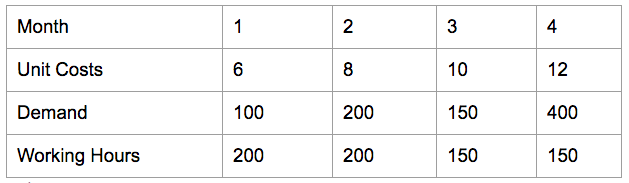

Using the helper function ,`lp_do`, I can output the results from methods provided by `lpSolveAPI` in a nicer format.

In [152]:

lp_do <- function(fn, value, dv_labels = c(""), constr_lables = c("")) {
    fn_name <- sprintf("%s", as.character(substitute(fn)))
    switch(fn_name,
           "solve" = {
               result <- fn(value)
               if (result == 0) {
                    return("Optimal solution found!")
                } else if (result == 2) {
                    return("The model is infeasible.")
                } else if (result == 3) {
                    return("The model is unbounded.")
                } else {
                    return(sprintf("Check documentation for status: %s", result))
                }
           },
           "get.objective" = {
                   sense <- substr(lp.control(value)$sense, 1, 3)
                   return(sprintf("Z %s = %g", sense, fn(value)))
           },
           "get.variables" = {
                   dv <- fn(value)
               
                   if (length(dv_labels) != length(dv)) {
                       return(dv)
                   }
                   else {
                       dv_df <-  data.frame(
                           DV = dv_labels,
                           Values = dv
                       )
                       
                       return(dv_df)
                   }
           },
           "get.constraints" = {
                   dv <- fn(value)
                   if (length(constr_lables) != length(dv)) {
                       return(dv)
                   }
                   else {
                       fmted_lables <- lapply(constr_lables, function (x) {return(sprintf("%s ->", x))})
                       dv_df <-  data.frame(
                           Constraints = unlist(fmted_lables),
                           Answers = dv
                       )
                       
                       return(dv_df)
                   }
           }
          )
}

First we load the library and then read the lp file.

In [11]:
library("lpSolveAPI")
lp_prob <- read.lp("data/PP_umuoh.lp")

In [132]:
lp_prob

Model name: 
            Q1    S1    Q2    S2    Q3    S3    Q4    S4        
Minimize    12     2    14     2    16     2    18     2        
R1           1    -1     0     0     0     0     0     0  =  100
R2           0     1     1    -1     0     0     0     0  =  200
R3           0     0     0     1     1    -1     0     0  =  150
R4           0     0     0     0     0     1     1    -1  =  400
Kind       Std   Std   Std   Std   Std   Std   Std   Std        
Type      Real  Real  Real  Real  Real  Real  Real  Real        
Upper      400   Inf   400   Inf   300   Inf   300   Inf        
Lower        0     0     0     0     0     0     0     0        

We first have to solve the lp model. We discover that the solution to our model is optimal.

In [136]:
lp_do(solve, lp_prob)

[1] "Optimal solution found!"

### 1. What are the decision variables ?

In [138]:
lp_do(get.variables, lp_prob, dv_labels = c("Q1", "S1", "Q2", "S2", "Q3" ,"S3", "Q4", "S4"))

DV,Values
Q1,400
S1,300
Q2,400
S2,500
Q3,50
S3,400
Q4,0
S4,0


### 2.  What is the objective function?

In [137]:
lp_do(get.objective, lp_prob)

[1] "Z min = 13600"

As you can see above the __objective function value__ is __13600__. This means that the manufacturing manager can reduce is costs to at most $13600

### 3. What are the constraints?

In [154]:
lp_do(get.constraints, lp_prob, constr_lables = c("Q1 - S1 = 100","S1 + Q2 - S2 = 200", "S2 + Q3 - S3 = 150", "S3 + Q4 - S4 = 400"))

Constraints,Answers
Q1 - S1 = 100 ->,100
S1 + Q2 - S2 = 200 ->,200
S2 + Q3 - S3 = 150 ->,150
S3 + Q4 - S4 = 400 ->,400


### 4. How will you modify the model if there is a fixed cost of $1,000 for each month that there is production? This cost is assumed only if there is production different from zero in that month.

In order to answer this question we would need to load a modified version of  our original lp file. 

In [191]:
lp_prob_4 <- read.lp("data/PP_umuoh_4.lp")

In [192]:
lp_prob_4

Model name: 
  a linear program with 12 decision variables and 8 constraints

In [193]:
lp_do(solve, lp_prob_4)

[1] "Optimal solution found!"

In [194]:
lp_do(get.objective, lp_prob_4)

[1] "Z min = 16600"

In [195]:
lp_do(get.variables, lp_prob_4, dv_labels = c("Q1", "S1", "B1", "Q2", "S2", "B2", "Q3" ,"S3", "B3", "Q4", "S4", "B4"))

DV,Values
Q1,850
S1,750
B1,3
Q2,0
S2,550
B2,0
Q3,0
S3,400
B3,0
Q4,0


In [196]:
lp_do(get.constraints, lp_prob_4, constr_lables = c(
    "Q1 - S1 = 100",
    "S1 + Q2 - S2 = 200",
    "S2 + Q3 - S3 = 150",
    "S3 + Q4 - S4 = 400",
    "Q1 <= 400 B1",
    "Q2 <= 400 B2",
    "Q3 <= 300 B3",
    "Q4 <= 300 B4"
))

Constraints,Answers
Q1 - S1 = 100 ->,100
S1 + Q2 - S2 = 200 ->,200
S2 + Q3 - S3 = 150 ->,150
S3 + Q4 - S4 = 400 ->,400
Q1 <= 400 B1 ->,-350
Q2 <= 400 B2 ->,0
Q3 <= 300 B3 ->,0
Q4 <= 300 B4 ->,0


### 5. For the next four months, the supplier of raw materials has made an special offer: all units purchased above 150 in any given month will have a discounts of `$`2. For instance, if a purchase of 350 units is ordered in month 1, the first 150 units will be sold for `$`12 each, and the following 200 will be sold for `$`10 each. Modify the original formulation and solve.

In [184]:
lp_prob_5 <- read.lp("data/PP_umuoh_5.lp")

In [185]:
lp_prob_5

Model name: 
  a linear program with 18 decision variables and 13 constraints

In [186]:
lp_do(solve, lp_prob_5)

[1] "Optimal solution found!"

In [187]:
lp_do(get.objective, lp_prob_5)

[1] "Z min = 12200"

In [188]:
lp_do(get.variables, lp_prob_5)

[1] 150 700 750   0   0 550   0   0 400   0   0   0   1   0   0   0   0   0

In [189]:
lp_do(get.constraints, lp_prob_5, constr_lables = c(
    "+Q1 -150 B1 >= 0",
    "+Q2 -150 B2 >= 0",
    "+Q3 -150 B3 >= 0",
    "+Q4 -150 B4 >= 0",
    "+R1 -1000 B1 <= 0",
    "+R2 -1000 B2 <= 0",
    "+R3 -1000 B3 <= 0",
    "+R4 -1000 B4 <= 0",
    "+R5 -1000 B5 <= 0",
    "+Q1 +R1 -S1 = 100",
    "+S1 +Q2 +R2 -S2 = 200",
    "+S2 +Q3 +R3 -S3 = 150",
    "+S3 +Q4 +R4 -S4 = 400"
))

Constraints,Answers
+Q1 -150 B1 >= 0 ->,0
+Q2 -150 B2 >= 0 ->,0
+Q3 -150 B3 >= 0 ->,0
+Q4 -150 B4 >= 0 ->,0
+R1 -1000 B1 <= 0 ->,-300
+R2 -1000 B2 <= 0 ->,0
+R3 -1000 B3 <= 0 ->,0
+R4 -1000 B4 <= 0 ->,0
+R5 -1000 B5 <= 0 ->,0
+Q1 +R1 -S1 = 100 ->,100
